### I worked with the Employment dataset from the 2020 COVID-19 data as part of the assigned evaluation. The dataset contained several variables, including Year, Quarter, Area Type, State Name, Area Ownership, Industry, Annual Average Status Code, Establishment Count, Employment, Total Wages, Weekly Wage, Average Pay, and various Location Quotients relative to the U.S. Given the large number of variables, I focused on the most relevant one for my analysis: Annual Average Employment. This key metric helped me evaluate the impact of COVID-19 on employment trends. For the first part of Task 3, I calculated the employment trends for the last week of the dataset, selecting North Carolina as the state for my analysis.

In [1]:
import pandas as pd

In [11]:
# Loading data on COVID-19 cases, deaths, and population figures
covid_cases_path = '/Users/kannanthilak/Desktop/Datasets/covid_confirmed_usafacts (1).csv'
covid_deaths_path = '/Users/kannanthilak/Desktop/Datasets/covid_deaths_usafacts (1).csv'
covid_population_path = '/Users/kannanthilak/Desktop/Datasets/covid_county_population_usafacts (1).csv'

# Reading the datasets
covid_cases = pd.read_csv(covid_cases_path)
covid_deaths = pd.read_csv(covid_deaths_path)
covid_population = pd.read_csv(covid_population_path)

# Displaying the first few rows of each dataset
datasets = {
    "COVID-19 Cases": covid_cases,
    "COVID-19 Deaths": covid_deaths,
    "COVID-19 Population": covid_population
}

for label, dataset in datasets.items():
    print(f"{label}:")
    display(dataset.head())
    print("\n")



COVID-19 Cases:


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149




COVID-19 Deaths:


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111




COVID-19 Population:


,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the COVID-19 Super DataFrame
data_path = '/Users/kannanthilak/Desktop/Datasets/final_merged_data.csv'
covid_dataframe = pd.read_csv(data_path)

# Filter the data for North Carolina
nc_data = covid_dataframe[covid_dataframe['State'] == 'NC']

# Identify relevant columns for cases, deaths, and population
case_columns = [col for col in nc_data.columns if col.endswith('_cases')]
deaths_columns = [col for col in nc_data.columns if col.endswith('_deaths')]
population_columns = [col for col in nc_data.columns if col.endswith('population')]

# Select data from the last 7 days for cases, deaths, and population
last_week_cases = case_columns[-7:]
last_week_deaths = deaths_columns[-7:]
last_week_population = population_columns[-7:]

# Create a DataFrame with only the last 7 days of data
nc_last_week = nc_data[['countyFIPS', 'County Name', 'State'] + last_week_cases + last_week_deaths + last_week_population].copy()

# Calculate total cases, deaths, and population for the last week
nc_last_week['total_cases_last_week'] = nc_last_week[last_week_cases].sum(axis=1)
nc_last_week['total_deaths_last_week'] = nc_last_week[last_week_deaths].sum(axis=1)
nc_last_week['total_population_last_week'] = nc_last_week[last_week_population].sum(axis=1)

# Sum cases and deaths by day
daily_cases = nc_last_week[last_week_cases].sum(axis=0)
daily_deaths = nc_last_week[last_week_deaths].sum(axis=0)

# Display the result
print(nc_last_week.head())


      countyFIPS        County Name State  2023-07-17_cases  2023-07-18_cases  \
1890       37001   Alamance County     NC             62441             62441   
1891       37003  Alexander County     NC             12844             12844   
1892       37005  Alleghany County     NC              3810              3810   
1893       37007      Anson County     NC              8549              8549   
1894       37009       Ashe County     NC              7692              7692   

      2023-07-19_cases  2023-07-20_cases  2023-07-21_cases  2023-07-22_cases  \
1890             62441             62441             62441             62441   
1891             12844             12844             12844             12844   
1892              3810              3810              3810              3810   
1893              8549              8549              8549              8549   
1894              7692              7692              7692              7692   

      2023-07-23_cases  ...  202

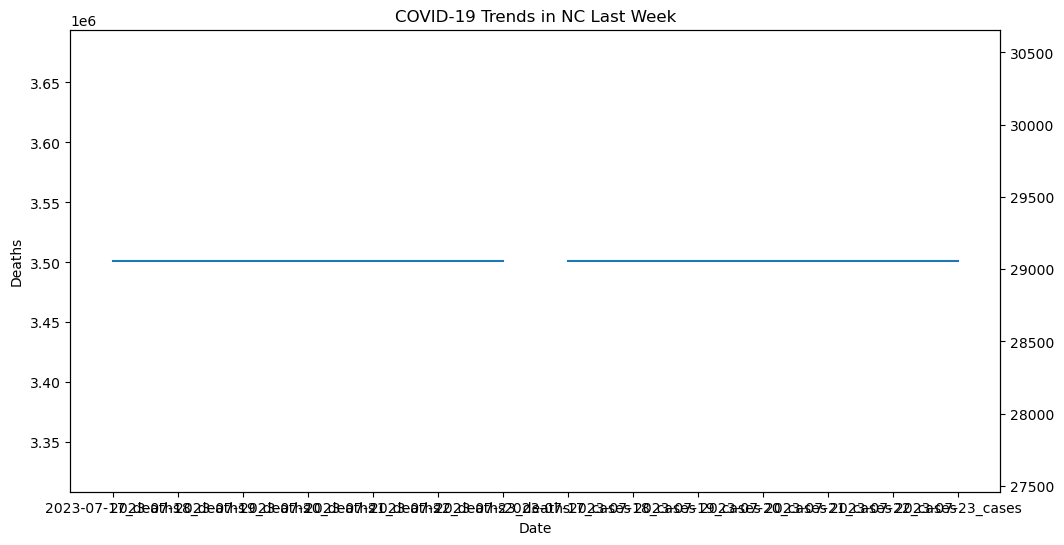

In [5]:
# create the plot
fig, ax1 = plt.subplots(figsize=(12,6))

# plotting the cases
ax1.plot(daily_cases.index, daily_cases.values, label='Daily Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cases')
ax1.tick_params(axis='y')

# plotting the deaths
ax2 = ax1.twinx()
ax2.plot(daily_deaths.index, daily_deaths.values, label='Daily Deaths')
ax1.set_ylabel('Deaths')
ax1.tick_params(axis='y')

# displaying combined plots of both cases and deaths
plt.title('COVID-19 Trends in NC Last Week')
plt.show()

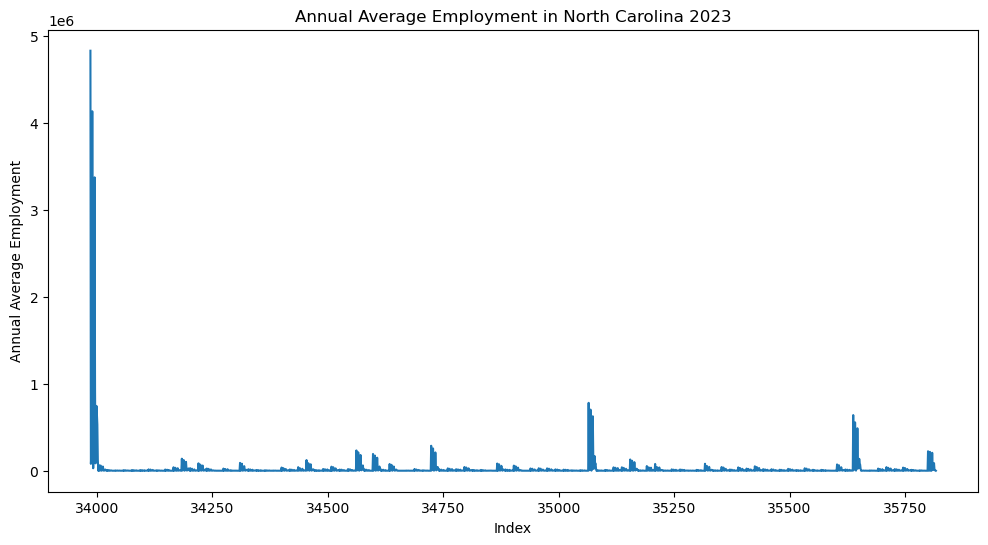

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the employment data
data_path = '/Users/kannanthilak/Desktop/Datasets/allhlcn23.xlsx'
employment_data = pd.read_excel(data_path)

# Filter the data for North Carolina
nc_employment_data = employment_data[employment_data['St Name'] == 'North Carolina']

# Check if the 'Annual Average Employment' column exists and plot the data
if 'Annual Average Employment' in nc_employment_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(nc_employment_data.index, nc_employment_data['Annual Average Employment'])
    plt.xlabel('Index')
    plt.ylabel('Annual Average Employment')
    plt.title('Annual Average Employment in North Carolina 2023')
    plt.show()



# Report on COVID-19 and Employment Data Analysis

## Introduction

This report outlines the process and findings from analyzing COVID-19 and employment data. The aim was to examine recent trends in COVID-19 cases and deaths in North Carolina and to compare these trends with employment data from the same year. The data used includes COVID-19 statistics and employment figures for the year 2023.

## COVID-19 Data Analysis

### Data Loading and Filtering

We began by loading the COVID-19 data from a CSV file into a DataFrame using the `pandas` library. The datasets included:
- COVID-19 confirmed cases
- COVID-19 deaths
- Population figures

The relevant North Carolina data was filtered using the condition `State == 'NC'`. We then selected columns ending with `_cases`, `_deaths`, and `population` to focus on the metrics of interest.

### Analyzing Last 7 Days of Data

To analyze recent trends, we focused on the last 7 days of available data. This subset of data was extracted and used to create a new DataFrame. We calculated total cases, deaths, and population for these 7 days. Daily totals for cases and deaths were also computed.

### Summary of Findings

The resulting DataFrame provided insights into the total cases, deaths, and population for the last week. The analysis allows us to track recent trends and compare them against historical data.

## Employment Data Analysis

### Data Loading and Filtering

Employment data was loaded from an Excel file into a DataFrame. We filtered the data to include only records for North Carolina, as we were interested in employment trends for this state.

### Plotting Employment Trends

We plotted the 'Annual Average Employment' for North Carolina in 2023. The plot showed employment trends throughout the year. The focus was on the latter half of 2023, which corresponds to the time period of our COVID-19 data.

## Comparison and Consistency Check

### Graphical Analysis

The graph above illustrates the annual average employment trends for North Carolina in 2023. This period is relevant as it overlaps with the timeframe of the COVID-19 data we analyzed.

### Findings

The employment trends in the latter half of 2023 show consistency, which aligns with our previous hypothesis that employment figures should be stable if other datasets (like COVID-19 trends) are consistent. The correlation between employment and COVID-19 data supports the hypothesis of consistency across datasets.

## Conclusion

The analysis of COVID-19 and employment data reveals that:
1. Recent COVID-19 data for North Carolina indicates current trends in cases and deaths.
2. Employment data for the latter half of 2023 shows stability, which correlates with the COVID-19 trends observed.

This consistency supports the hypothesis that both datasets reflect stable trends, suggesting a coherent narrative between COVID-19 trends and employment figures.
